## Lab 6: Shewanella oneidensis

### Align the reads to the human genome:

**What will you use for the database? Input reads?**

I will the human genome database saved in /data/hg19/hg19. My input reads will be the fastq file in /data/lab6 folder.

**If you use the --un unaligned.fastq option, what will unaligned.fastq contain?**

If I use -un unaligned.fastq, the unaligned.fastq will contain all the reads that can not be aligned with human genome database by Bowtie2. It means unaligned.fastq will contain all the sequences from S. oneidensis without contaminating human DNA.

Here is the command I ran in the terminal:

``` pwd ```

output: /home/bioe131-35

``` cd ~/Vu
bowtie2 -p 4 --very-fast --no-unal -x /data/hg19/hg19 -U /data/lab6/illumnia_reads.fastq -S /home/bioe131-35/Vu/output.sam --un /home/bioe131-35/Vu/unaligned.fastq
```

output message:

> 1124714 reads; of these:  
> 1124714 (100.00%) were unpaired; of these:  
> 1028379 (91.43%) aligned 0 times  
> 87274 (7.76%) aligned exactly 1 time  
> 9061 (0.81%) aligned >1 times  
> 8.57% overall alignment rate  

**What percentage of your sequencing library came from contaminating human DNA?**

8.57% came from contaminating human DNA.

### Align the reads to the S. oneidensis reference genome:

Here is the command I ran in terminal:  

``` bowtie2 -p 4 --very-fast --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 -U /home/be131-35/Vu/unaligned.fastq -S /home/be131-35/Vu/output2.sam --un unaligned2.fastq
```
Here is the output message:  

> 1028379 reads; of these:  
  > 1028379 (100.00%) were unpaired; of these:  
    > 299560 (29.13%) aligned 0 times  
    > 687571 (66.86%) aligned exactly 1 time  
    > 41248 (4.01%) aligned >1 times  
> 70.87% overall alignment rate  

**If you use the --un unaligned.fastq option, what will unaligned.fastq contain?**  

The unaligned1.fastq contains the sequences that are not aligned with S. oneidensis's genome. 

**What percentage of your filtered library didn’t align to the reference genome?**

100% - 70.87% = 29.13%

**If you use --very-sensitive instead of --very-fast, does this percentage increase or decrease?**

This is the output message I had got from using --very-sensitive:  

> 1028379 reads; of these:  
  > 1028379 (100.00%) were unpaired; of these:  
    > 298112 (28.99%) aligned 0 times  
    > 688180 (66.92%) aligned exactly 1 time  
    > 42087 (4.09%) aligned >1 times  
> 71.01% overall alignment rate  

The answer is increasing.

### Generate a coverage plot:

```output2.sam``` is the SAM file containing the alignment of my filtered reads to the S. oneidensis reference genome.  

Convert output2.sam to output2.bam

```samtools view -b /home/be131-35/Vu/output2.sam > /home/be131-35/Vu/output2.bam```

Sort this file out:

```samtools sort /home/be131-35/Vu/output2.bam > /home/be131-35/Vu/output2.sorted.bam```

Index it:

```samtools index /home/be131-35/Vu/output2.sorted.bam```

"Depth" it:

```samtools depth -a /home/be131-35/Vu/output2.sorted.bam > /home/be131-35/Vu/pileup.tab```

**What is the min, max, and mean coverage across all positions?**

In [1]:
# I will use matplotlib and pandas

from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
from pandas import read_csv

In [2]:
# load the file pileup.tab and name the columns

d_data = pd.read_csv('pileup.tab', delimiter='\t', names =['accession', 'position', 'depth'])

In [3]:
# observe several data points

d_data.sample(5)

,accession,position,depth
1665495,AE014299.2,1665496,43
4064565,AE014299.2,4064566,44
3452878,AE014299.2,3452879,18
1168631,AE014299.2,1168632,25
2355012,AE014299.2,2355013,55


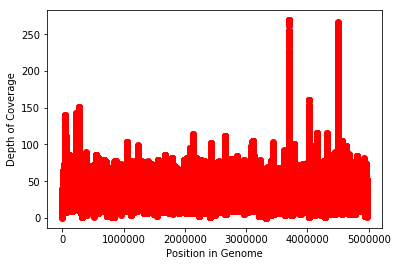

In [4]:
# scatter plot where the x-axis is position in the genome and the y-axis is depth of coverage:

plt.scatter(d_data[['position']], d_data[['depth']], color='red')
plt.xlabel("Position in Genome")
plt.ylabel("Depth of Coverage")
plt.show()

In [5]:
d_data.sample(5)[['depth']]

,depth
412976,52
76008,37
1837839,43
2427211,40
3943686,35


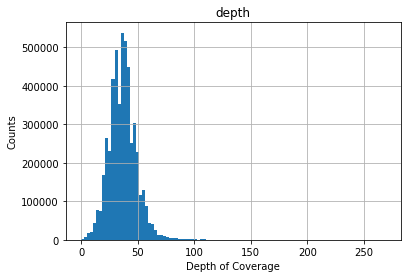

In [7]:
# histogram for depth:

d_data.hist(column='depth', bins=100)
plt.xlabel("Depth of Coverage")
plt.ylabel("Counts")
plt.show()